In [166]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from common_functions import coordinate_extractor, mean_squared_error, create_and_display_phase_portrait

In [167]:
matrix_t0 = coordinate_extractor("linear_vectorfield_data_x0.txt")
matrix_t1 = coordinate_extractor("linear_vectorfield_data_x1.txt")

In [168]:
matrix_t0.shape

(1000, 2)

In [169]:
def ls_minimizer_matrix(X, F):
    
    """
    
    Minimizes the least square error and returns a closed form solution.
    
    Args:
        
        - X (numpy.ndarray): Input value matrix with shape (no. of samples, no. of dimensions of input space).
        - F (numpy.ndarray): Output value matrix with shape (no. of samples, no. of dimensions of output space).

    Returns:
    
        - A (numpy.ndarray): Coefficient matrix with shape (no. of dimensions of output space, no. of dimensions of output space).
    
    """
    
    X_T = np.transpose(X)

    # Compute X^T X
    X_T_X = np.dot(X_T, X)

    # Compute the inverse of X^T X
    X_T_X_inv = np.linalg.inv(X_T_X)

    # Compute X^T F
    X_T_F = np.dot(X_T, F)

    # Solve for the parameters using the normal equation
    A = np.dot(X_T_X_inv, X_T_F)

    return A

In [170]:
# Coefficient matrix for linear transformation
A = ls_minimizer_matrix(matrix_t0, matrix_t1)
A

array([[ 0.95064476, -0.04638232],
       [ 0.02319115,  0.90426243]])

In [171]:
def linear_system_derivative(t, phi, A):
    
    """
    
    Defines the system of ordinary differential equations (ODE) for the convolution rule.

    Args:
    
        - t (float): Time variable.
        - phi (numpy.ndarray): State vector representing the positions of points.
        - A (numpy.ndarray): Pre-calculated coefficient matrix .

    Returns:
    
        - numpy.ndarray: The derivative of phi with respect to time.
        
    """
    dphi_dt = np.dot(A, phi)
    return dphi_dt

In [172]:
def position_matrix_predictor(t_initial, t_final, initial_pos_matrix, A):
    
    """
    
    Calculates the final position matrix at t_final.
    
    Args:
        
        - t_inital (float): Initial time of observation.
        - t_final (float): Final time of observation.
        - initial_pos_matrix (numpy.ndarray): Position matrix at time t = t_initial.
        - A (numpy.ndarray): Pre-calculated coefficient matrix. 
    
    Returns:
        
        - numpy.ndarray: Position matrix at time t = t_final.
    
    """
    final_positions = []
    
    # Time span for integration
    t_span = (t_initial, t_final)
    
    # For every individual point, we find out its coordinates
    for i in range(initial_pos_matrix.shape[0]):
        phi_t0 = initial_pos_matrix[i ,:]
        
        # Solve the ODE using solve_ivp
        # dense_output = True for continuous solution calculation
        solution = solve_ivp(linear_system_derivative, t_span, phi_t0, args=(A,), dense_output=True)
        
        final_positions.append(solution.sol(t_span[1]).tolist())
    
    return np.array(final_positions)

In [173]:
pred_matrix_t1 = position_matrix_predictor(0, 0.01, matrix_t0, A)

In [174]:
pred_matrix_t1.shape

(1000, 2)

In [175]:
mse = mean_squared_error(matrix_t1,pred_matrix_t1)
mse

0.002933405709444968

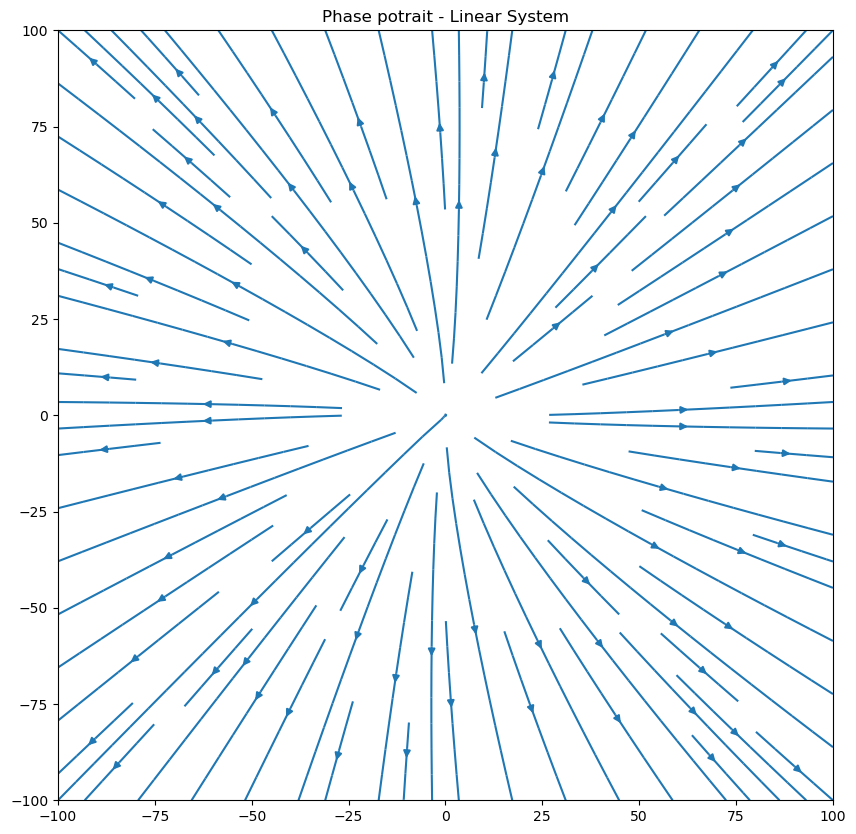

In [178]:
phase_portrait(A, "Phase potrait - Linear System")

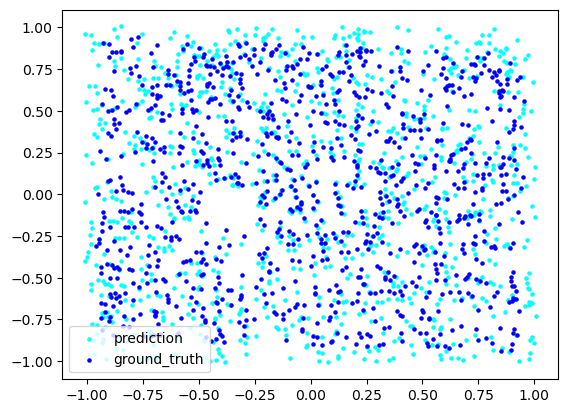

In [177]:
plt.scatter(pred_matrix_t1[:, 0], pred_matrix_t1[:, 1], c='cyan', s=5, label='prediction')
plt.scatter(matrix_t1[:, 0], matrix_t1[:, 1], c='blue', s=5, label='ground_truth')
plt.legend()
plt.show()